In [1]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestRegressor

# GRID SEARCHING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# READ DATA
data_file_path = "data/"

X_train = np.load(data_file_path+'X_train_reg.npy')
X_test = np.load(data_file_path+'X_test_reg.npy')
y_train = np.load(data_file_path+'y_train_reg.npy')
y_test = np.load(data_file_path+'y_test_reg.npy')
y_test = [1 if x>1 else 0 for x in y_test]
cols = np.load(data_file_path+'cols.npy')

# n_estimators

In [3]:
value = []
mean = []
std = []
for n_estimators in range(2, 20):
    temp = []
    for trial in range(10):
        model = RandomForestRegressor( 
                                      n_estimators = n_estimators,
                                     )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp.append(roc_auc_score(y_test, y_pred))
    value.append(n_estimators)
    mean.append(np.array(temp).mean())
    std.append(np.array(temp).std())

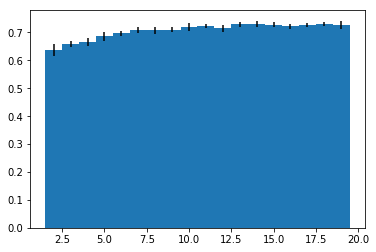

In [73]:
plt.bar(value, mean, width = 1, yerr=std)
plt.show()

# max_features

In [59]:
value = []
mean = []
std = []
for max_features in range(1, 100, 10):
    temp = []
    for trial in range(10):
        model = RandomForestRegressor(n_estimators = 9, 
                                      max_features = max_features,
                                     )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp.append(roc_auc_score(y_test, y_pred))
    value.append(max_features)
    mean.append(np.array(temp).mean())
    std.append(np.array(temp).std())

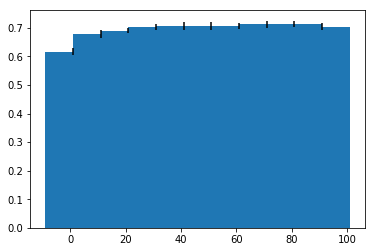

In [60]:
plt.bar(value, mean, width = 10, yerr=std)
plt.show()

# max_depth

In [57]:
value = []
mean = []
std = []
for max_depth in np.arange(2, 300, 20):
    temp = []
    for trial in range(10):
        model = RandomForestRegressor(n_estimators = 9, 
                                      max_features = 20,
                                      max_depth = max_depth
                                     )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp.append(roc_auc_score(y_test, y_pred))
    value.append(max_depth)
    mean.append(np.array(temp).mean())
    std.append(np.array(temp).std())
    

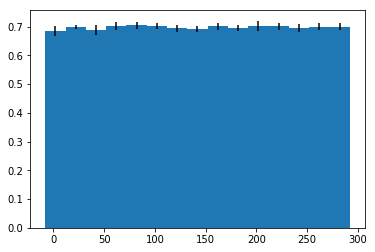

In [56]:
plt.bar(value, mean, width = 20, yerr=std)
plt.show()

# min_samples_split

In [50]:
value = []
mean = []
std = []
for min_samples_split in np.arange(2, 300, 20):
    temp = []
    for trial in range(10):
        model = RandomForestRegressor(n_estimators = 9, 
                                      max_features = 20,
                                      min_samples_split = min_samples_split
                                     )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        temp.append(roc_auc_score(y_test, y_pred))
    value.append(min_samples_split)
    mean.append(np.array(temp).mean())
    std.append(np.array(temp).std())

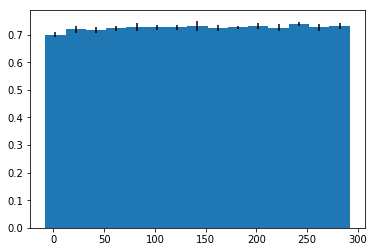

In [54]:
plt.bar(value, mean, width = 20, yerr=std)
plt.show()